<a href="https://colab.research.google.com/github/ActiveStacks/DatasetOne/blob/main/Final1_EXPERIMENT_BERTLLM_1E5ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
import torch
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
    # QARK: Quick Android Review Kit (Vulnerability Scanner)
    # QARK SCANNED DATASET
# path1 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Qark_Processed.csv')
# path2 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Qark_Processed.csv')
#path3 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Qark_Processed.csv')


    # MOBSF: Mobile Security Framework (Vulnerability Scanner)
    # MOBSF SCANNED DATASET
# path4 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_MobSF_Processed.csv')
path5 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_MobSF_Processed.csv')
# path6 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_MobSF_Processed.csv')

    # COMBINED DATASET
#path7 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Combined_Processed.csv')
# path8 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Combined_Processed.csv')
# path9 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Combined_Processed.csv')

In [4]:
df = pd.read_csv(path5)

In [5]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package a.t.a.a;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package a.t.a.a;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import a.h.b.e;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.b.e;
3,3,NaN,NaN,NaN,import a.h.c.a.h;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.c.a.h;
4,4,NaN,NaN,NaN,import a.t.a.a.g;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.t.a.a.g;


In [6]:
df.dropna()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
28263,28263,App can read/write to External Storage. Any Ap...,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",c.c.a.t.a.b(Environment.getExternalStorageDire...,high,exact,5.5,CWE-276,Incorrect Default Permissions,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,c.c.a.t.a.b(Environment.getExternalStorageDire...
28268,28268,App can read/write to External Storage. Any Ap...,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",if (str.startsWith(Environment.getExternalStor...,high,exact,5.5,CWE-276,Incorrect Default Permissions,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,if (str.startsWith(Environment.getExternalStor...
28269,28269,App can read/write to External Storage. Any Ap...,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",str2 = Environment.getExternalStorageDirectory...,high,exact,5.5,CWE-276,Incorrect Default Permissions,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,str2 = Environment.getExternalStorageDirectory...
28271,28271,App can read/write to External Storage. Any Ap...,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",return Environment.getExternalStorageDirectory...,high,exact,5.5,CWE-276,Incorrect Default Permissions,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,return Environment.getExternalStorageDirectory...
28272,28272,App can read/write to External Storage. Any Ap...,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",String absolutePath = Environment.getExternalS...,high,exact,5.5,CWE-276,Incorrect Default Permissions,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,String absolutePath = Environment.getExternalS...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901545,2301028,App can read/write to External Storage. Any Ap...,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",this.m_sdcardDirectory = Environment.getExtern...,high,exact,5.5,CWE-276,Incorrect Default Permissions,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,this.m_sdcardDirectory = Environment.getExtern...
1901553,2301037,App can read/write to External Storage. Any Ap...,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",String str = Environment.getExternalStorageDir...,high,exact,5.5,CWE-276,Incorrect Default Permissions,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,String str = Environment.getExternalStorageDir...
1901577,2301061,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","Log.d(""TEST"", ""key = "" + i + "" "" + i2);",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(""user_str"", ""user_str"" + i + ""user_str"" ..."
1902511,2303778,App can read/write to External Storage. Any Ap...,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",String baseDir = Environment.getExternalStorag...,high,exact,5.5,CWE-276,Incorrect Default Permissions,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,String baseDir = Environment.getExternalStorag...


In [7]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package a.t.a.a;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package a.t.a.a;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import a.h.b.e;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.b.e;
3,3,NaN,NaN,NaN,import a.h.c.a.h;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.c.a.h;
4,4,NaN,NaN,NaN,import a.t.a.a.g;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.t.a.a.g;


In [8]:
df.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
1903445,2304949,NaN,NaN,NaN,if (r1 != null) goto L_0x0022;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,if (r1 != null) goto L_0x0022;
1903446,2304950,NaN,NaN,NaN,private static KeyStore a(Context context) {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,private static KeyStore a(Context context) {
1903447,2304951,NaN,NaN,NaN,InputStream openRawResource = context.getResou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,InputStream openRawResource = context.getResou...
1903448,2304952,NaN,NaN,NaN,"instance.load(openRawResource, null);",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"instance.load(openRawResource, null);"
1903449,2304953,App creates temp file. Sensitive information s...,Regex,\.createTempFile\(,"File createTempFile = File.createTempFile(""htt...",warning,exact,5.5,CWE-276,Incorrect Default Permissions,M2: Insecure Data Storage,MSTG-STORAGE-2,NaN,1,"File createTempFile = File.createTempFile(""use..."


In [9]:
df.shape

(1903450, 15)

In [10]:
df.describe()

,index,CVSS,Vulnerability_status
count,1.903450e+06,28221.000000,1.903450e+06
mean,1.077246e+06,6.993714,1.482624e-02
std,6.711911e+05,1.352684,1.208571e-01
min,0.000000e+00,0.000000,0.000000e+00
25%,4.758622e+05,7.500000,0.000000e+00
50%,1.056762e+06,7.500000,0.000000e+00
75%,1.637960e+06,7.500000,0.000000e+00
max,2.304953e+06,8.800000,1.000000e+00


In [11]:
df.columns

Index(['index', 'Description', 'Type', 'Pattern', 'Code', 'Severity',
       'Input Case', 'CVSS', 'CWE_ID', 'CWE_Desc', 'OWASP_Mobile',
       'OWSAP_MASVS', 'Reference', 'Vulnerability_status', 'processed_code'],
      dtype='object')

In [12]:
df.nunique()

,0
index,1903450
Description,24
Type,4
Pattern,24
Code,1897407
Severity,4
Input Case,2
CVSS,9
CWE_ID,12
CWE_Desc,12


In [13]:
df['Vulnerability_status'].unique()

array([0, 1])

In [14]:
print(df['Vulnerability_status'].value_counts())

Vulnerability_status
0    1875229
1      28221
Name: count, dtype: int64


In [15]:
df_safe = df[df['Vulnerability_status']==0]

In [16]:
df_vulnerable = df[df['Vulnerability_status']==1]

In [17]:
df_safe.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package a.t.a.a;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package a.t.a.a;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import a.h.b.e;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.b.e;
3,3,NaN,NaN,NaN,import a.h.c.a.h;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.c.a.h;
4,4,NaN,NaN,NaN,import a.t.a.a.g;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.t.a.a.g;


In [18]:
df_safe.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
1903444,2304948,NaN,NaN,NaN,return new InflaterInputStream(httpURLConnecti...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,return new InflaterInputStream(httpURLConnecti...
1903445,2304949,NaN,NaN,NaN,if (r1 != null) goto L_0x0022;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,if (r1 != null) goto L_0x0022;
1903446,2304950,NaN,NaN,NaN,private static KeyStore a(Context context) {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,private static KeyStore a(Context context) {
1903447,2304951,NaN,NaN,NaN,InputStream openRawResource = context.getResou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,InputStream openRawResource = context.getResou...
1903448,2304952,NaN,NaN,NaN,"instance.load(openRawResource, null);",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"instance.load(openRawResource, null);"


In [19]:
df_vulnerable.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
175,175,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(""VectorDrawableCompat"", ""parser error"", ...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", ""user_str"", e4);"
567,567,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.w(y, ""Compatibility shadow requested but c...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.w(y, ""user_str"");"
1220,1220,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(""CSLCompat"", ""Failed to inflate ColorSta...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", ""user_str"", e2);"
1473,1473,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.v(""FragmentManager"", g.toString());",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.v(""user_str"", g.toString());"
1550,1550,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(""TypefaceCompatApi21Impl"", e2.getClass()...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", e2.getClass().getName(), e2);"


In [20]:
df_vulnerable.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
1903071,2304463,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.i(""FreeMobileNetstat"", ""Loading statistics...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.i(""user_str"", ""user_str"" + new Date(elapse..."
1903307,2304743,App uses SQLite Database and execute raw SQL q...,RegexAndOr,"['android\\.database\\.sqlite', ['rawQuery\\('...",sQLiteDatabase.execSQL(strArr[i]);,warning,exact,5.9,CWE-89,Improper Neutralization of Special Elements us...,M7: Client Code Quality,NaN,https://github.com/MobSF/owasp-mstg/blob/maste...,1,sQLiteDatabase.execSQL(strArr[i]);
1903380,2304861,This App uses SSL certificate pinning to detec...,RegexAndOr,['org\\.thoughtcrime\\.ssl\\.pinning|\\.getTru...,"instance.init(null, d, b);",good,exact,0.0,NaN,NaN,NaN,MSTG-NETWORK-4,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"instance.init(null, d, b);"
1903395,2304883,This App uses SSL certificate pinning to detec...,RegexAndOr,['org\\.thoughtcrime\\.ssl\\.pinning|\\.getTru...,httpsURLConnection.setHostnameVerifier(new Bro...,good,exact,0.0,NaN,NaN,NaN,MSTG-NETWORK-4,https://github.com/MobSF/owasp-mstg/blob/maste...,1,httpsURLConnection.setHostnameVerifier(new Bro...
1903449,2304953,App creates temp file. Sensitive information s...,Regex,\.createTempFile\(,"File createTempFile = File.createTempFile(""htt...",warning,exact,5.5,CWE-276,Incorrect Default Permissions,M2: Insecure Data Storage,MSTG-STORAGE-2,NaN,1,"File createTempFile = File.createTempFile(""use..."


In [21]:
# DATA IMBALANCE CORRECTION VIA RANDOM UNDERSAMPLING OF MAJORITY DATA

In [22]:
df_safe_sampled = df_safe.sample(len(df_vulnerable), random_state = 42)

In [23]:
df_balanced = pd.concat([df_safe_sampled, df_vulnerable])

In [24]:
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [25]:
print(df_balanced['Vulnerability_status'].value_counts())

Vulnerability_status
1    28221
0    28221
Name: count, dtype: int64


In [26]:
print(df_balanced.value_counts())

index    Description                                                                                 Type     Pattern                                                                                                                                                                                            Code                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Severity  Input Case  CVSS  CWE_ID   CWE_Desc                                    OWASP_Mobile               OWSAP_MASVS      Reference                                                   

<Axes: >

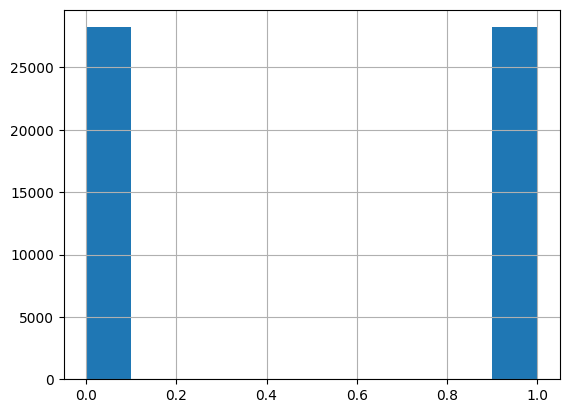

In [27]:
df_balanced['Vulnerability_status'].hist()

In [28]:
df_balanced.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,959096,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"System.out.print(r11.nextLong(max2) + "" "");",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"System.out.print(r11.nextLong(max2) + ""user_st..."
1,1311119,NaN,NaN,NaN,this.board.executeOnBoard(move);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.board.executeOnBoard(move);
2,2272193,NaN,NaN,NaN,"o(""loadPromo: isNetworkConnected() = true, sta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"o(""user_str"" + this.f + "", url = \""user_str"" +..."
3,1799363,NaN,NaN,NaN,private TextView mCurrentFolderView;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,private TextView mCurrentFolderView;
4,893411,NaN,NaN,NaN,return new FileInputStream(this.filePath);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,return new FileInputStream(this.filePath);


In [29]:
df_balanced.drop(['Severity', 'Description','Code', 'CWE_ID','CWE_Desc'], axis=1, inplace=True)

In [30]:
df_balanced.head(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,959096,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"System.out.print(r11.nextLong(max2) + ""user_st..."
1,1311119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.board.executeOnBoard(move);
2,2272193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"o(""user_str"" + this.f + "", url = \""user_str"" +..."
3,1799363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,private TextView mCurrentFolderView;
4,893411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,return new FileInputStream(this.filePath);
5,269778,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(str2, ""user_str"" + this.f8444k);"
6,1702028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,//user_comment b f4698c;
7,1913555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,JingleRtpConnection.this.receiveSessionAccept(...
8,179280,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(""user_str"", e3.toString());"
9,156834,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"System.out.println(""!!! TightDB debug version ..."


In [31]:
df_balanced.tail(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
56432,1817169,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(TAG_SERVER, ""user_str"" + vector.x + ""use..."
56433,454411,Regex,"\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\""",exact,4.3,NaN,MSTG-CODE-2,NaN,1,"addAzStyle(""AT"", ""Artemis"", ""1.2.3.4"");"
56434,612856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"public void addPart(String key, File file) {"
56435,1156698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"wVar3.d(this.f9546e, 4);"
56436,685726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,perms[10] = 100;
56437,2194434,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(""user_str"", intent.getAction().toString());"
56438,510463,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(Main.LOG_TAG, Intrinsics.stringPlus(""use..."
56439,508743,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(Main.LOG_TAG, ""user_str"");"
56440,1853186,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"System.err.println(""\nRuleset so far: "");"
56441,1257547,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(SearchFragment.TAG, ""user_str"", e);"


In [32]:
df_balanced.dropna()

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
34,2076703,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,public static final String PREFS_GCM_REG_KEY =...
37,389673,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,private static final String SCAN_PERIOD_KEY = ...
54,1582130,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",exact,5.5,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,File file = new File(Environment.getExternalSt...
59,361789,RegexOr,"['\\.getInstance\\(.*SHA-1', '\\.getInstance\\...",exact,5.9,M5: Insufficient Cryptography,MSTG-CRYPTO-4,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"this.mac = Mac.getInstance(""HmacSHA1"");"
67,494500,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,private static final String PREF_SAVED_LOCKED_...
...,...,...,...,...,...,...,...,...,...,...
56343,77339,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,private static final String DATA_HOLDER_KEY = ...
56371,560048,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,private static final String ADD_EVENT_DEFAULT_...
56407,1805507,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,public static final String PREF_LOGIN_PASSWORD...
56413,1293856,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",exact,5.5,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,File file = new File(getApplication().getExter...


In [33]:
df_balanced = df_balanced[['processed_code', 'Vulnerability_status']]

In [34]:
df_balanced.head()

,processed_code,Vulnerability_status
0,"System.out.print(r11.nextLong(max2) + ""user_st...",1
1,this.board.executeOnBoard(move);,0
2,"o(""user_str"" + this.f + "", url = \""user_str"" +...",0
3,private TextView mCurrentFolderView;,0
4,return new FileInputStream(this.filePath);,0


In [35]:
df_balanced.columns = ['text', 'labels']

In [36]:
df_balanced.head(5)

,text,labels
0,"System.out.print(r11.nextLong(max2) + ""user_st...",1
1,this.board.executeOnBoard(move);,0
2,"o(""user_str"" + this.f + "", url = \""user_str"" +...",0
3,private TextView mCurrentFolderView;,0
4,return new FileInputStream(this.filePath);,0


In [37]:
df_balanced.head(5)

,text,labels
0,"System.out.print(r11.nextLong(max2) + ""user_st...",1
1,this.board.executeOnBoard(move);,0
2,"o(""user_str"" + this.f + "", url = \""user_str"" +...",0
3,private TextView mCurrentFolderView;,0
4,return new FileInputStream(this.filePath);,0


In [38]:
df_balanced.to_csv('processed_dataset.csv', index=False)

In [39]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [40]:
from datasets import load_dataset, DatasetDict

In [41]:
codes_dataset = load_dataset('csv', data_files='processed_dataset.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [42]:
codes_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 56442
    })
})

In [43]:
# from posixpath import split
train_testvalid = codes_dataset['train'].train_test_split(test_size=0.4, seed=42)
test_valid = train_testvalid['test'].train_test_split(test_size=0.5)


In [44]:
split_dataset = DatasetDict(
    {
        'train': train_testvalid['train'],
        'test' : test_valid['test'],
        'valid': test_valid['train']
    }
)

In [45]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 33865
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 11289
    })
    valid: Dataset({
        features: ['text', 'labels'],
        num_rows: 11288
    })
})

In [46]:
from transformers import AutoTokenizer
checkpoint = "google-bert/bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [47]:
def tokenize_function(sets):
  return tokenizer(sets['text'], truncation=True, padding=True)

In [48]:
def tokenize_function(sets):
  if isinstance(sets['text'], list):
    sets['text'] =[str(text) for text in sets['text']]
  else:
      sets['text'] = str(sets['text'])
  return tokenizer(sets['text'],padding='max_length', truncation=True, max_length=512, return_tensors='pt')

In [49]:
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/33865 [00:00<?, ? examples/s]

Map:   0%|          | 0/11289 [00:00<?, ? examples/s]

Map:   0%|          | 0/11288 [00:00<?, ? examples/s]

In [50]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [51]:
!pip install torchinfo

In [52]:
from torchinfo import summary

In [53]:
summary(model)

Layer (type:depth-idx)                                       Param #
BertForSequenceClassification                                --
├─BertModel: 1-1                                             --
│    └─BertEmbeddings: 2-1                                   --
│    │    └─Embedding: 3-1                                   23,440,896
│    │    └─Embedding: 3-2                                   393,216
│    │    └─Embedding: 3-3                                   1,536
│    │    └─LayerNorm: 3-4                                   1,536
│    │    └─Dropout: 3-5                                     --
│    └─BertEncoder: 2-2                                      --
│    │    └─ModuleList: 3-6                                  85,054,464
│    └─BertPooler: 2-3                                       --
│    │    └─Linear: 3-7                                      590,592
│    │    └─Tanh: 3-8                                        --
├─Dropout: 1-2                                               --
├─L

In [54]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                   save_strategy='epoch',
                                  num_train_epochs=4,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [55]:
# def compute_metrics(logits_and_labels):
#   logits, labels = logits_and_labels
#   predictions = np.argmax(logits, axis=-1)
#   acc=np.mean(predictions == labels)
#   f1 = f1_score(labels, predictions, average = 'binary')
#   recalls = recall_score(labels, predictions, average = 'binary')
#   precisions = precision_score(labels, predictions, average = "binary")
#   return {'accuracy' : acc, 'recall' : recalls, 'precision' : precisions, 'f1':f1, }

In [56]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.6 MB/s eta 0:00:00


In [57]:
import evaluate

In [58]:

def compute_metrics(eval_pred):
  prec = evaluate.load("precision")
  rec = evaluate.load("recall")
  f1c = evaluate.load("f1")
  acc = evaluate.load("accuracy")
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)

  precisions=prec.compute(predictions=predictions, references=labels)
  recalls=rec.compute(predictions=predictions, references=labels)
  f1s=f1c.compute(predictions=predictions, references=labels)
  accs = acc.compute(predictions=predictions, references=labels)

  return {'accuracy' : accs, 'recall' : recalls, 'precision' : precisions, 'f1':f1s, }





In [59]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['valid'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

<ipython-input-59-5bb568b18981>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [60]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,0.056400,0.052268,{'accuracy': 0.9879518072289156},{'recall': 0.9920212765957447},{'precision': 0.9839957791065775},{'f1': 0.9879922302666431}
2,0.045600,0.041546,{'accuracy': 0.9910524450744153},{'recall': 0.9906028368794326},{'precision': 0.9914818101153505},{'f1': 0.9910421286031043}
3,0.039000,0.035519,{'accuracy': 0.9926470588235294},{'recall': 0.9936170212765958},{'precision': 0.9916828879844275},{'f1': 0.9926490124878221}
4,0.026800,0.041555,{'accuracy': 0.9918497519489724},{'recall': 0.9948581560283688},{'precision': 0.9888967218893197},{'f1': 0.9918684815273113}


Trainer is attempting to log a value of "{'accuracy': 0.9879518072289156}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'recall': 0.9920212765957447}" of type <class 'dict'> for key "eval/recall" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.9839957791065775}" of type <class 'dict'> for key "eval/precision" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.9879922302666431}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.9910524450744153}" of type <class 

TrainOutput(global_step=8468, training_loss=0.04873288437956394, metrics={'train_runtime': 3069.3723, 'train_samples_per_second': 44.133, 'train_steps_per_second': 2.759, 'total_flos': 3.56410235590656e+16, 'train_loss': 0.04873288437956394, 'epoch': 4.0})

In [61]:
outcome= trainer.predict(tokenized_datasets['test'])

In [62]:
print(outcome.metrics)

{'test_loss': 0.04043351486325264, 'test_accuracy': {'accuracy': 0.9920276375232527}, 'test_recall': {'recall': 0.9950177935943061}, 'test_precision': {'precision': 0.9890343119915105}, 'test_f1': {'f1': 0.9920170303352848}, 'test_runtime': 74.8984, 'test_samples_per_second': 150.724, 'test_steps_per_second': 2.363}
